In [22]:
import pandas as pd


In [23]:
import matplotlib
from matplotlib import pyplot as plt


In [24]:
%matplotlib inline
matplotlib.rcParams['figure.figsize'] = (12,8)


In [25]:

df = pd.read_csv("C:\\Users\\yasee\\Downloads\\bhp.csv")
df.head()


,location,size,total_sqft,bath,price,bhk,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,3699
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,4615
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,4305
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,6245
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,4250


In [26]:

df.price_per_sqft.describe()


count    1.320000e+04
mean     7.920337e+03
std      1.067272e+05
min      2.670000e+02
25%      4.267000e+03
50%      5.438000e+03
75%      7.317000e+03
max      1.200000e+07
Name: price_per_sqft, dtype: float64

(array([1.3196e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 6.00253650e+05, 1.20024030e+06, 1.80022695e+06,
        2.40021360e+06, 3.00020025e+06, 3.60018690e+06, 4.20017355e+06,
        4.80016020e+06, 5.40014685e+06, 6.00013350e+06, 6.60012015e+06,
        7.20010680e+06, 7.80009345e+06, 8.40008010e+06, 9.00006675e+06,
        9.60005340e+06, 1.02000401e+07, 1.08000267e+07, 1.14000133e+07,
        1.20000000e+07]),
 <BarContainer object of 20 artists>)

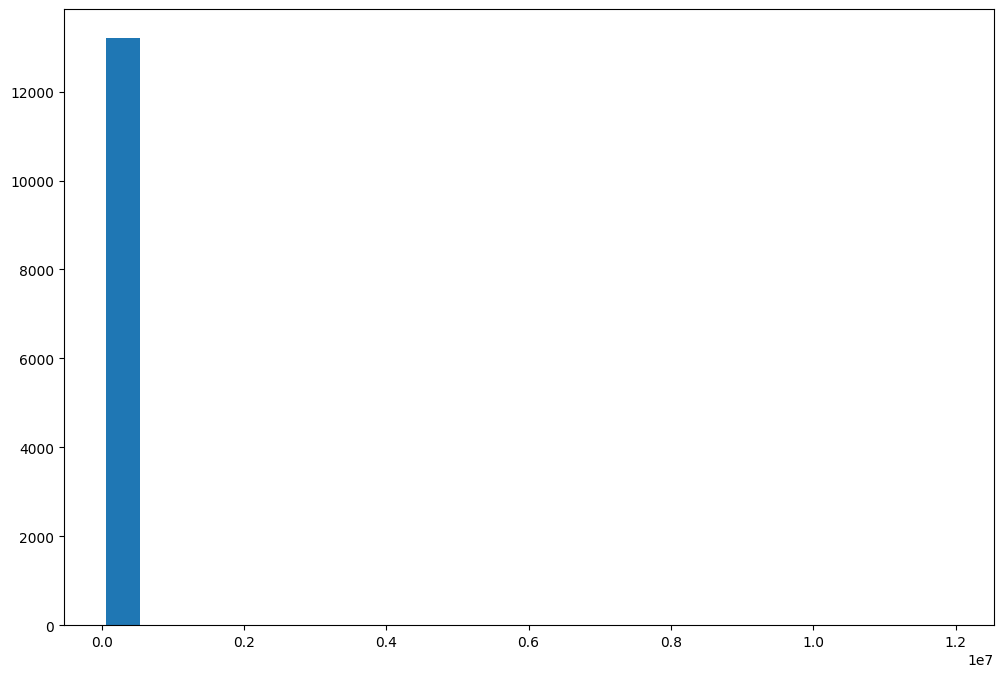

In [27]:

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)


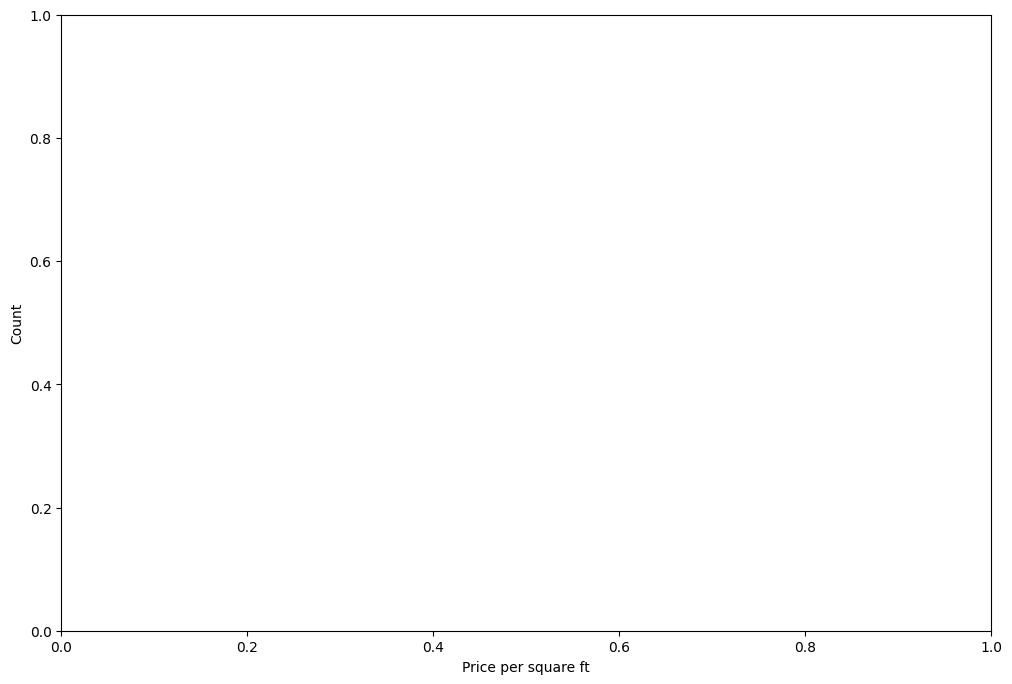

In [28]:
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()


(array([1.3196e+04, 2.0000e+00, 0.0000e+00, 1.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00,
        0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 1.0000e+00]),
 array([2.67000000e+02, 6.00253650e+05, 1.20024030e+06, 1.80022695e+06,
        2.40021360e+06, 3.00020025e+06, 3.60018690e+06, 4.20017355e+06,
        4.80016020e+06, 5.40014685e+06, 6.00013350e+06, 6.60012015e+06,
        7.20010680e+06, 7.80009345e+06, 8.40008010e+06, 9.00006675e+06,
        9.60005340e+06, 1.02000401e+07, 1.08000267e+07, 1.14000133e+07,
        1.20000000e+07]),
 <BarContainer object of 20 artists>)

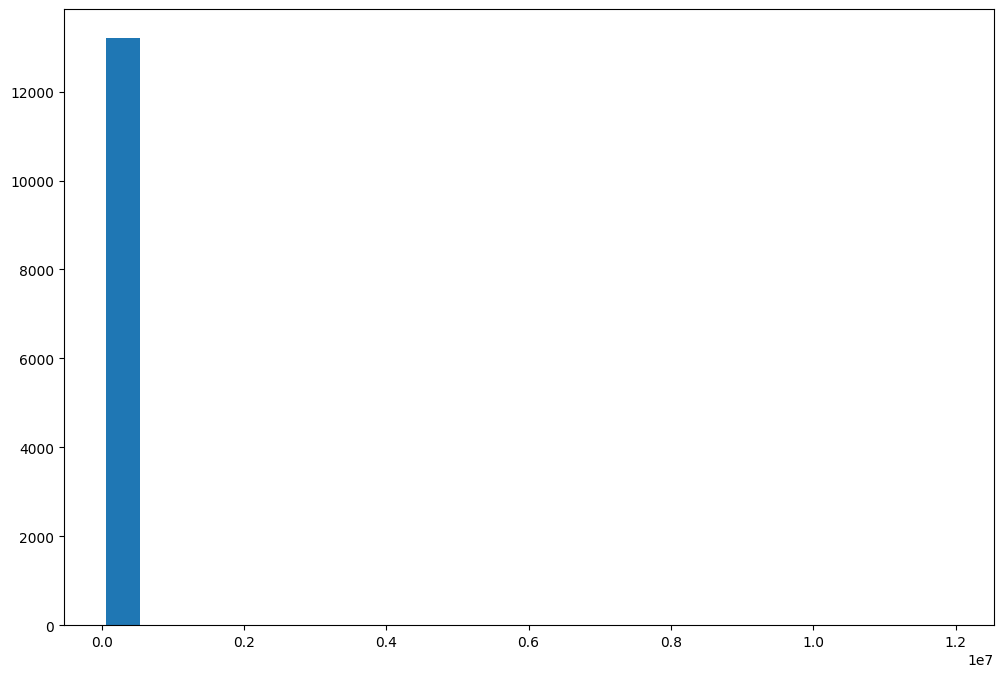

In [29]:

plt.hist(df.price_per_sqft, bins=20, rwidth=0.8)


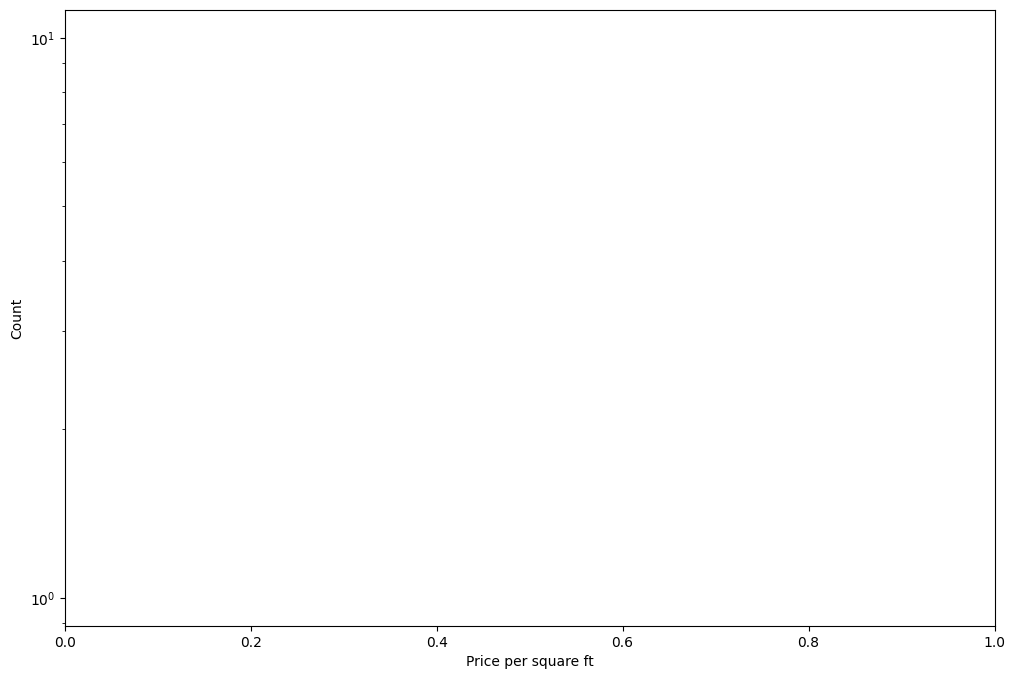

In [30]:
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.yscale('log')
plt.show()


In [31]:

lower_limit, upper_limit = df.price_per_sqft.quantile([0.001, 0.999])
lower_limit, upper_limit


(1366.184, 50959.36200000098)

In [32]:

outliers = df[(df.price_per_sqft > upper_limit) | (df.price_per_sqft < lower_limit)]
outliers.sample(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
1106,other,5 Bedroom,24.0,2.0,150.0,5,625000
5417,Ulsoor,4 BHK,36000.0,4.0,450.0,4,1250
6356,Bommenahalli,4 Bedroom,2940.0,3.0,2250.0,4,76530
8300,Kengeri,1 BHK,1200.0,1.0,14.0,1,1166
798,other,4 Bedroom,10961.0,4.0,80.0,4,729
1005,other,1 BHK,15.0,1.0,30.0,1,200000
12328,other,4 Bedroom,4350.0,8.0,2600.0,4,59770
9144,other,4 Bedroom,10961.0,4.0,80.0,4,729
5597,JP Nagar,2 BHK,1100.0,1.0,15.0,2,1363
7012,other,1 BHK,650.0,1.0,500.0,1,76923


In [33]:

df2 = df[(df.price_per_sqft < upper_limit) & (df.price_per_sqft > lower_limit)]
df2.shape


(13172, 7)

In [34]:

df.shape


(13200, 7)

In [35]:

df.shape[0] - df2.shape[0]


28

In [36]:

max_limit = df2.price_per_sqft.mean() + 4 * df2.price_per_sqft.std()
min_limit = df2.price_per_sqft.mean() - 4 * df2.price_per_sqft.std()
max_limit, min_limit


(np.float64(23227.73653589432), np.float64(-9900.429065502582))

In [37]:

df2[(df2.price_per_sqft > max_limit) | (df2.price_per_sqft < min_limit)].sample(10)


,location,size,total_sqft,bath,price,bhk,price_per_sqft
12636,OMBR Layout,5 Bedroom,600.0,3.0,140.0,5,23333
9711,Rajaji Nagar,2 Bedroom,1056.0,1.0,250.0,2,23674
13185,Hulimavu,1 BHK,500.0,1.0,220.0,1,44000
9808,Uttarahalli,6 Bedroom,1200.0,6.0,330.0,6,27500
7901,other,4 Bedroom,2400.0,4.0,600.0,4,25000
3340,other,19 BHK,2000.0,16.0,490.0,19,24500
11696,other,4 Bedroom,2360.0,4.0,601.0,4,25466
6135,other,3 Bedroom,4273.0,3.0,1100.0,3,25743
1705,other,4 Bedroom,1700.0,2.0,550.0,4,32352
11650,other,5 Bedroom,9600.0,7.0,2736.0,5,28500


In [38]:

df3 = df2[(df2.price_per_sqft > min_limit) & (df2.price_per_sqft < max_limit)]
df3.shape


(13047, 7)

In [39]:

df2.shape[0] - df3.shape[0]


125

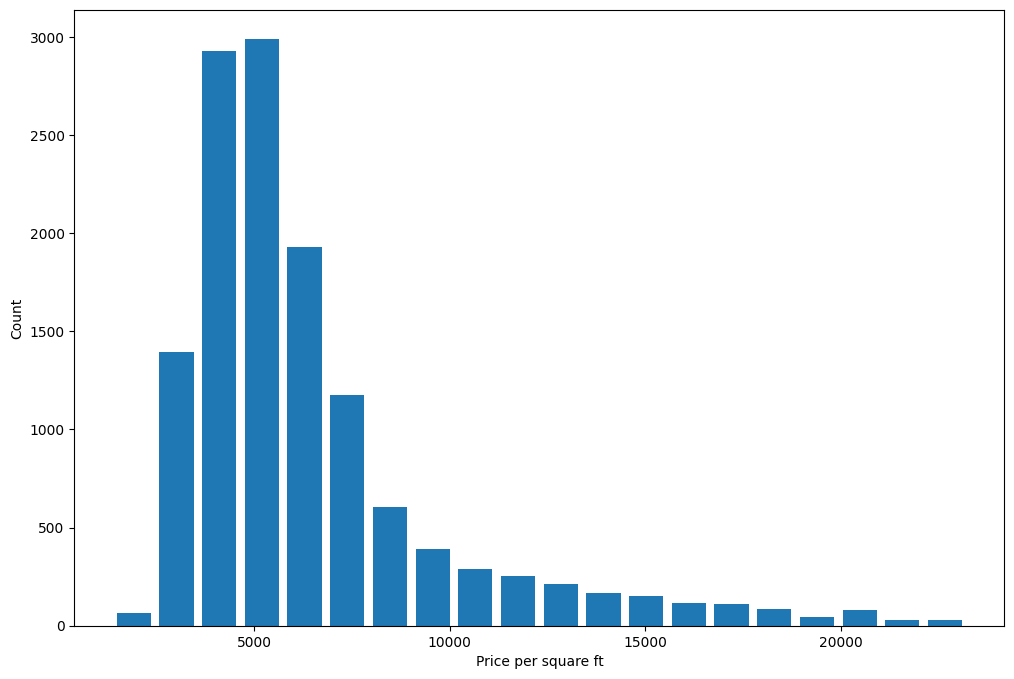

In [40]:

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8)
plt.xlabel('Price per square ft')
plt.ylabel('Count')
plt.show()


In [41]:

from scipy.stats import norm
import numpy as np


Text(0, 0.5, 'Count')

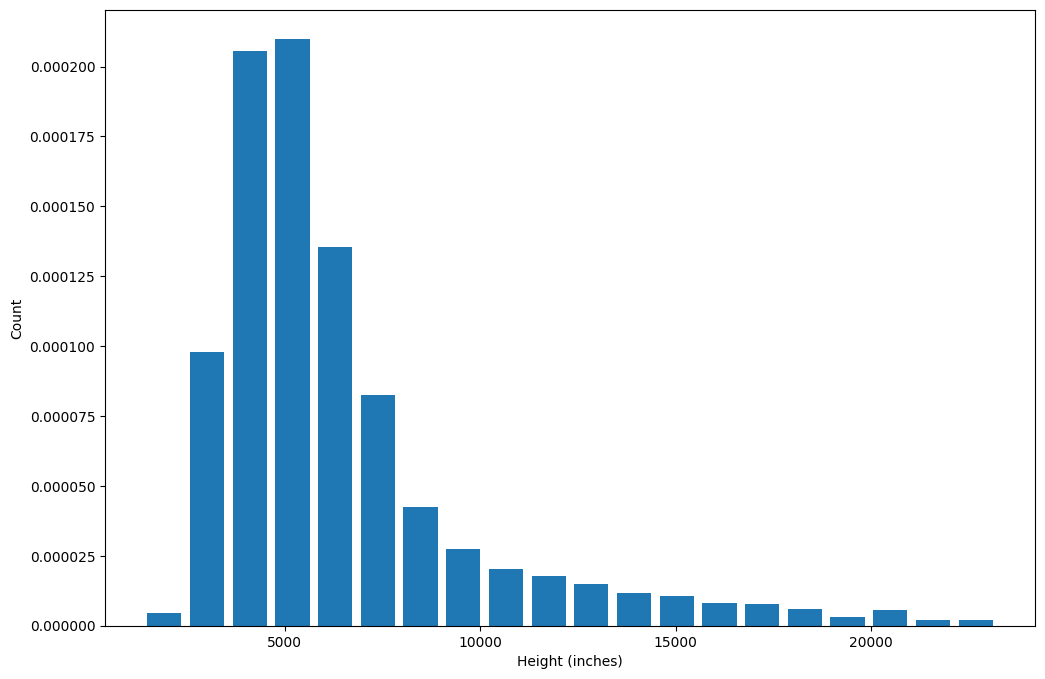

In [42]:

plt.hist(df3.price_per_sqft, bins=20, rwidth=0.8, density=True)
plt.xlabel('Height (inches)')
plt.ylabel('Count')


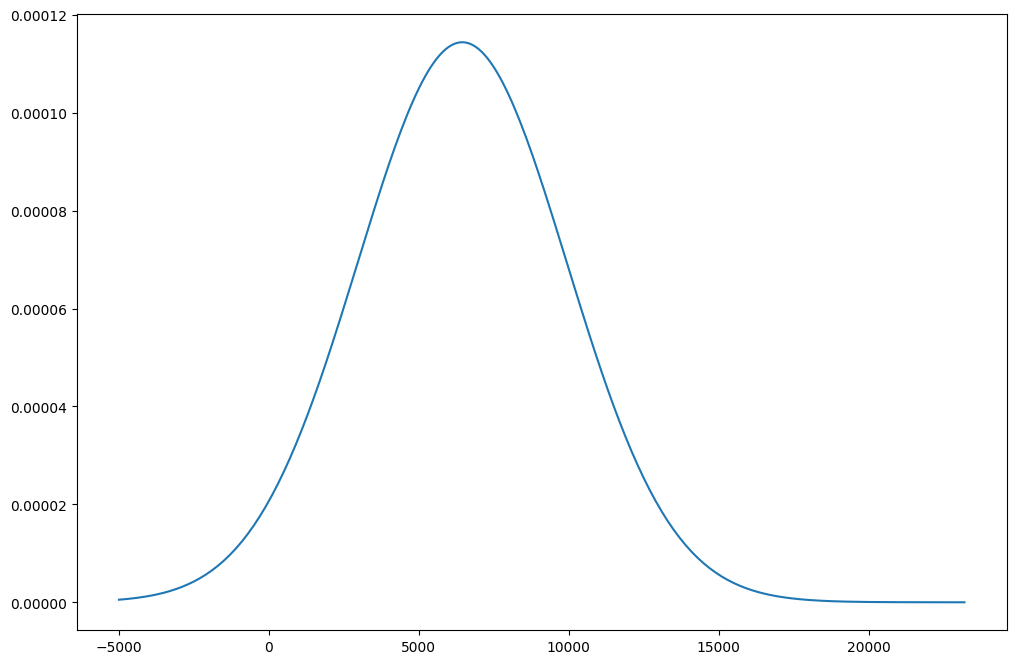

In [43]:

rng = np.arange(-5000, df3.price_per_sqft.max(), 100)
plt.plot(rng, norm.pdf(rng, df3.price_per_sqft.mean(), df3.price_per_sqft.std()))


In [44]:

df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()
df2.sample(10)


C:\Users\yasee\AppData\Local\Temp\ipykernel_2808\3042514602.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['zscore'] = (df2.price_per_sqft - df2.price_per_sqft.mean()) / df2.price_per_sqft.std()


,location,size,total_sqft,bath,price,bhk,price_per_sqft,zscore
13006,Whitefield,3 BHK,1639.0,3.0,107.00,3,6528,-0.032759
10330,Babusapalaya,2 BHK,1061.0,2.0,38.95,2,3671,-0.722685
10303,Rayasandra,5 BHK,3600.0,5.0,145.00,5,4027,-0.636716
919,Ambedkar Nagar,3 BHK,1935.0,4.0,130.00,3,6718,0.013124
268,Talaghattapura,3 BHK,1868.0,3.0,131.00,3,7012,0.084121
12001,Iblur Village,4 BHK,3633.0,5.0,335.00,4,9221,0.617564
391,Doddathoguru,2 BHK,1050.0,2.0,32.00,2,3047,-0.873373
10876,other,4 BHK,3500.0,4.0,320.00,4,9142,0.598487
11108,other,2 BHK,1100.0,2.0,62.00,2,5636,-0.248164
11352,Jakkur,2 BHK,1291.0,2.0,75.00,2,5809,-0.206387


In [45]:

outliers_z = df2[(df2.zscore < -4) | (df2.zscore > 4)]
outliers_z.shape


(125, 8)

In [46]:

outliers_z.sample(5)

df4 = df2[(df2.zscore > -4) & (df2.zscore < 4)]
df4.shape


(13047, 8)

In [47]:

df2.shape[0] - df4.shape[0]

125